<a href="https://colab.research.google.com/github/ExploreUrSELF/internship/blob/main/Big_sales_prediction_using_Random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

Import csv as dataframe

In [ ]:
df=pd.read_csv("Train.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


get Columns names

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Get missing values

In [ ]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


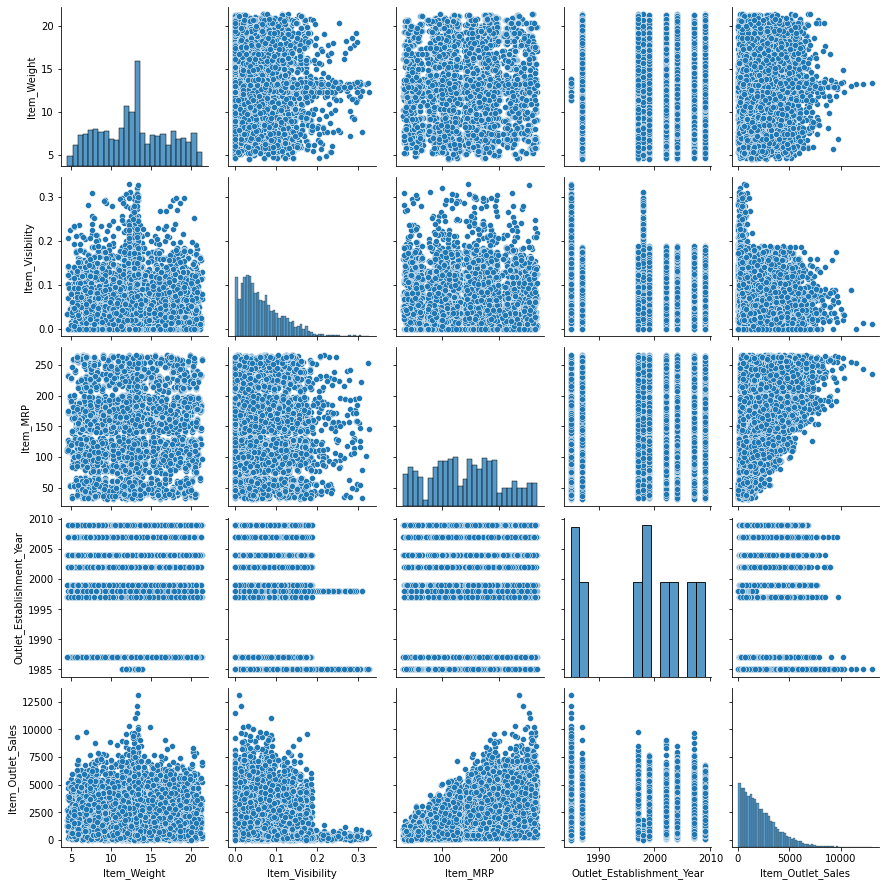

In [ ]:
import seaborn as sns
sns.pairplot(df)

Get categories and count of categorical variables

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDG33              10
FDW13              10
NCL31               9
FDX04               9
NCQ06               9
                   ..
FDN52               1
FDC23               1
FDT35               1
DRF48               1
FDE52               1
Length: 1559, dtype: int64

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               935
OUT013               932
OUT035               930
OUT046               930
OUT049               930
OUT045               929
OUT018               928
OUT017               926
OUT010               555
OUT019               528
dtype: int64

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [ ]:
df.replace({'Outlet_Size': {'Small':0,'Medium':1,'High':2}}, inplace=True )

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1.0            2793
0.0            2388
2.0             932
dtype: int64

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  3350
Tier 2                  2785
Tier 1                  2388
dtype: int64

In [ ]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              5577
0              1083
3               935
2               928
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 799.2+ KB


Get Shape of the dataframe

In [ ]:
df.shape

(8523, 12)

define y(dependent or labelor target variable and X (Independent or feature or attribute variable)

In [ ]:
y=df['Item_Outlet_Sales']

In [ ]:
y.shape

(8523,)

In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
X=df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [ ]:
X=df.drop(['Item_Identifier', 'Item_Outlet_Sales'],axis=1)

In [ ]:
X.shape

(8523, 10)

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,1
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,2
2,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,1
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,0
4,8.930,0,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,1
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,1
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0.0,Tier 2,1
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1.0,Tier 3,2


Get X variable Standardized

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [ ]:
X_std=sc.fit_transform(X_std)

In [ ]:
X_std

array([[-0.84060081, -0.97073217,  1.74745381,  0.13954076],
       [-1.63917263, -0.90811123, -1.48902325,  1.33410274],
       [ 1.0967628 , -0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.53345779, -0.59978449, -0.89720755,  0.73682175],
       [-1.33439226,  1.53287976, -0.60797692,  1.33410274],
       [ 0.45885039, -0.41193591, -1.05226104, -0.09937163]])

In [ ]:
X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(X_std,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.840601,0,-0.970732,Dairy,1.747454,OUT049,0.139541,1.0,Tier 1,1
1,-1.639173,1,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,1.0,Tier 3,2
2,1.096763,0,-0.956917,Meat,0.010040,OUT049,0.139541,1.0,Tier 1,1
3,1.498411,1,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,NaN,Tier 3,0
4,-0.928018,0,-1.281758,Household,-1.399220,OUT013,-1.293934,2.0,Tier 3,1
...,...,...,...,...,...,...,...,...,...,...
8518,-1.415903,0,-0.181193,Snack Foods,1.180783,OUT013,-1.293934,2.0,Tier 3,1
8519,-1.057964,1,-0.371154,Baking Goods,-0.527301,OUT045,0.497909,NaN,Tier 2,1
8520,-0.533458,0,-0.599784,Health and Hygiene,-0.897208,OUT035,0.736822,0.0,Tier 2,1
8521,-1.334392,1,1.532880,Snack Foods,-0.607977,OUT018,1.334103,1.0,Tier 3,2


get train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7670, 10), (853, 10), (7670,), (853,))

Get model Train

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr =RandomForestRegressor(random_state=2529)

In [ ]:
rfr.fit(X_train, y_train)

ValueError: ignored

Get model prediction

In [ ]:
y_pred=rfr.predict(X_test)


NotFittedError: ignored

In [ ]:
y_pred.shape

NameError: ignored

In [ ]:
y_pred

NameError: ignored

Get model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

NameError: ignored

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
r2_score(y_test,y_pred)

Get visualization odfActual Vs Predicted Results

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price")
plt.show()